In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
injury_data = pd.read_csv('injury_data.csv')
injury_data.head(10)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
5,38,75.820549,206.631824,1,0.359209,4,0
6,24,70.126050,177.044588,0,0.823552,2,0
7,36,79.038206,181.523155,1,0.820696,3,1
8,28,64.086096,183.794821,1,0.477350,1,1
9,28,66.829986,198.115048,1,0.350819,1,0


In [3]:
injury_data['Player_BMI'] = injury_data['Player_Weight'] / (injury_data['Player_Height'] / 100) ** 2
bmi_gaps = [-float('inf'), 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_groups = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
injury_data['BMI_Group'] = pd.cut(injury_data['Player_BMI'], bins=bmi_gaps, labels=bmi_groups, right=False)

In [4]:
age_gaps = [injury_data['Player_Age'].min(), 22, 26, 30, 34, injury_data['Player_Age'].max()]
age_labels = ["18-22", "23-26", "27-30", "31-34", "35+"]
injury_data['Age_Group'] = pd.cut(injury_data['Player_Age'], bins=age_gaps, labels=age_labels, include_lowest=True)

In [5]:
injury_data.head(10)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Player_BMI,BMI_Group,Age_Group
0,24,66.251933,175.732429,1,0.457929,5,0,21.453331,Normal,23-26
1,37,70.996271,174.581650,0,0.226522,6,1,23.293693,Normal,35+
2,32,80.093781,186.329618,0,0.613970,2,1,23.069332,Normal,31-34
3,28,87.473271,175.504240,1,0.252858,4,1,28.398810,Overweight,27-30
4,25,84.659220,190.175012,0,0.577632,1,1,23.408164,Normal,23-26
5,38,75.820549,206.631824,1,0.359209,4,0,17.757937,Underweight,35+
6,24,70.126050,177.044588,0,0.823552,2,0,22.372477,Normal,23-26
7,36,79.038206,181.523155,1,0.820696,3,1,23.986838,Normal,35+
8,28,64.086096,183.794821,1,0.477350,1,1,18.971308,Normal,27-30
9,28,66.829986,198.115048,1,0.350819,1,0,17.026933,Underweight,27-30


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [7]:
def plotting(conf_matrix, accuracy, precision, recall, f1):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    plt.figure(figsize=(8, 6))
    plt.bar(metrics.keys(), metrics.values(), color='skyblue')
    plt.ylim([round(min(accuracy, precision, recall, f1), 4), round(max(accuracy, precision, recall, f1), 4)])
    plt.ylabel('Score')
    plt.title('Model Evaluation Metrics')
    plt.show()

In [8]:
X = injury_data[['Player_Age', 'Player_BMI', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time']]
y = injury_data['Likelihood_of_Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Age          1000 non-null   int64  
 1   Player_BMI          1000 non-null   float64
 2   Previous_Injuries   1000 non-null   int64  
 3   Training_Intensity  1000 non-null   float64
 4   Recovery_Time       1000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


Accuracy: 0.5666666666666667
Precision: 0.5680535628885701
Recall: 0.5666666666666667
F1 Score: 0.5657407407407408
Confusion Matrix:
[[91 57]
 [73 79]]


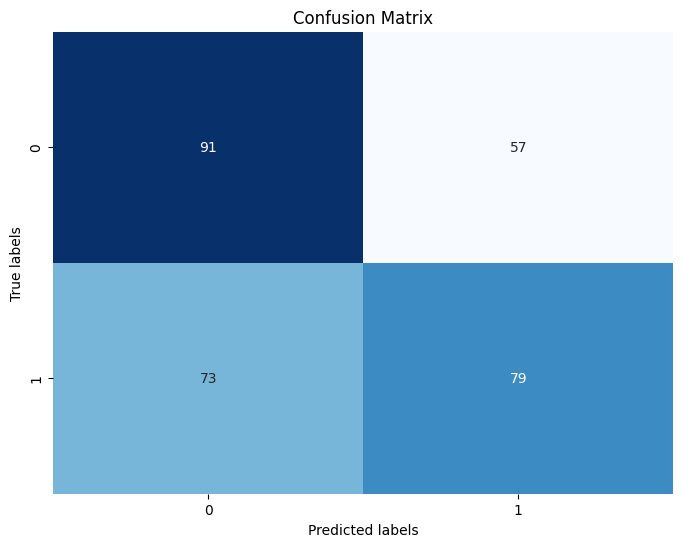

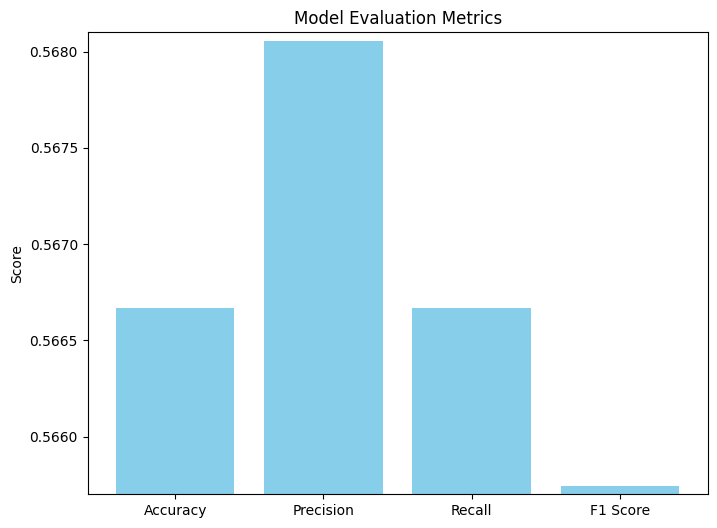

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
plotting(conf_matrix, accuracy, precision, recall, f1)

Accuracy: 0.5066666666666667
Precision: 0.5073429951690821
Recall: 0.5066666666666667
F1 Score: 0.5058984056358917
Confusion Matrix:
[[81 67]
 [81 71]]


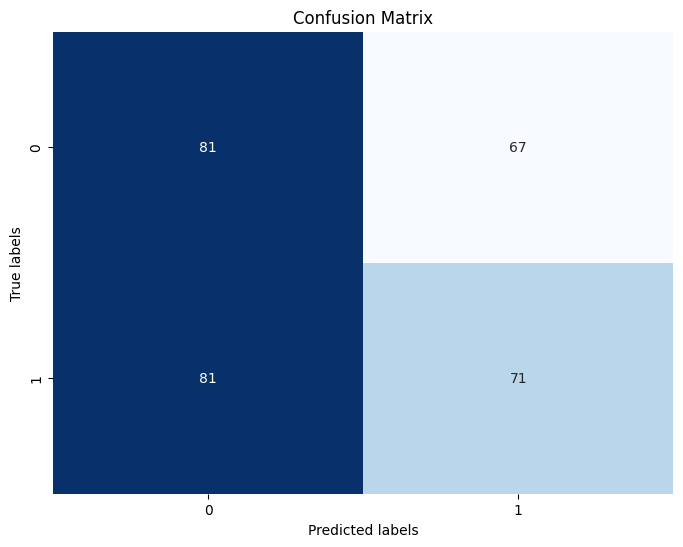

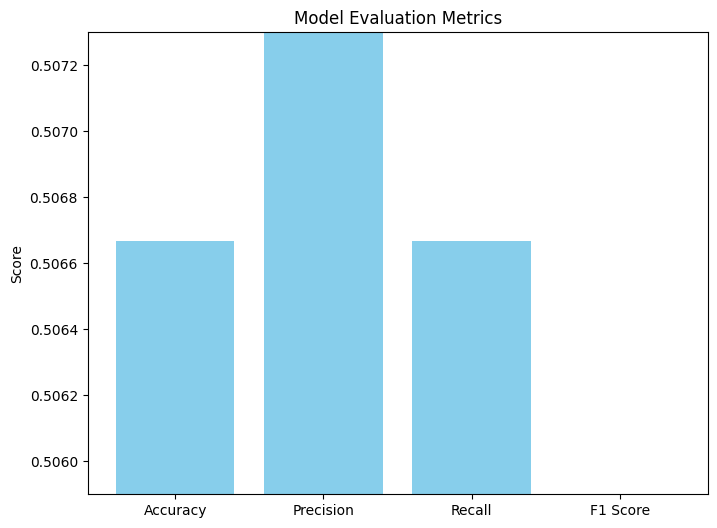

In [74]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
plotting(conf_matrix, accuracy, precision, recall, f1)

Accuracy: 0.54
Precision: 0.5404415954415954
Recall: 0.54
F1 Score: 0.5398364153627311
Confusion Matrix:
[[83 65]
 [73 79]]


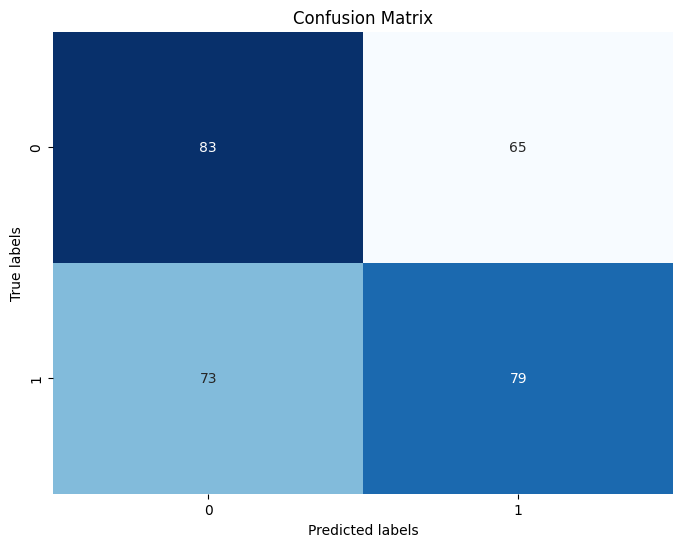

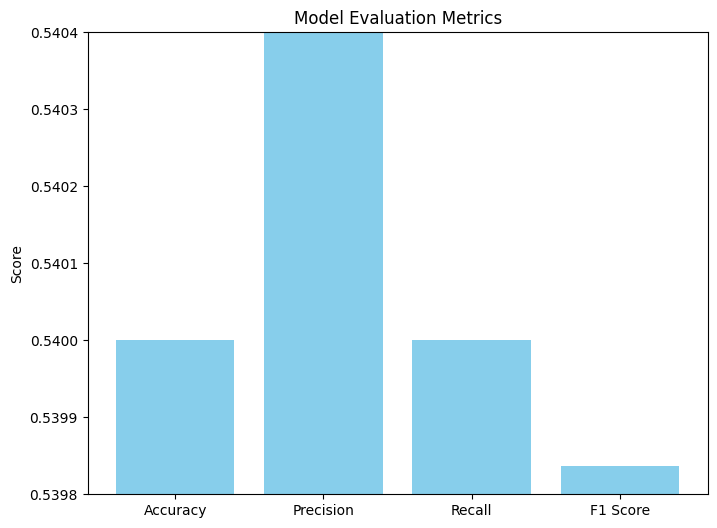

In [75]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
plotting(conf_matrix, accuracy, precision, recall, f1)

Accuracy: 0.5366666666666666
Precision: 0.5365011209597196
Recall: 0.5366666666666666
F1 Score: 0.536434791312181
Confusion Matrix:
[[76 72]
 [67 85]]


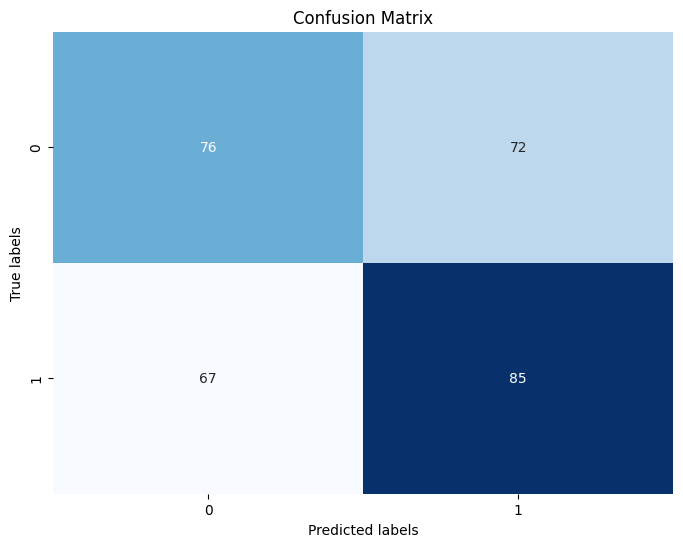

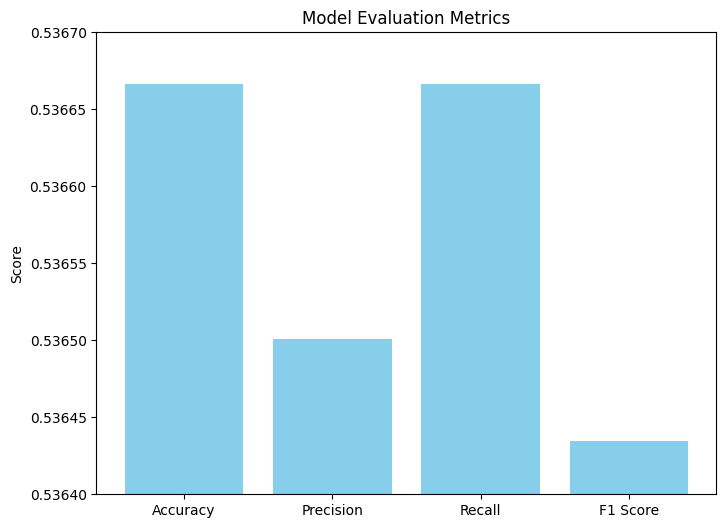

In [76]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
plotting(conf_matrix, accuracy, precision, recall, f1)

In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as ort

In [27]:
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

with open("logistic_regression_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [33]:
sample_input_min = np.array([[35, 14.5, 0, 0.2, 3]], dtype=np.float32)
session = ort.InferenceSession("logistic_regression_model.onnx")

input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

results = session.run([output_name], {input_name: sample_input_min})
print("Inference result:", results[0])

Inference result: [0]
